In [98]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Concatenate, Lambda
from keras.optimizers import Adam
import tensorflow as tf

Generate the data for this exercise

In [7]:
# Generate values for the function in the range (-3,3)
def generate_data(num_samples=1000, xrange=(-3,3), yrange=(-3,3)):
    x_values=np.random.uniform(xrange[0], xrange[1], num_samples)
    y_values=np.random.uniform(yrange[0],yrange[1], num_samples)

    f_values = -(x_values*(x_values-1) + y_values*(1-y_values)) + 12*np.cos(x_values*y_values)*np.sin(2*x_values+y_values)

    return x_values, y_values, f_values

x, y, f = generate_data()

print(x[:5])
print(y[:5])
print(f[:5])

[-1.11075638  2.30644004 -1.95428616 -2.61386188  1.71202049]
[ 0.32805531 -0.81899379 -1.70024253 -1.07462568  2.82677767]
[-13.19846827   0.75516193  -8.55269322  -6.99934193   3.89567167]


Build a NN with a couple of Dense layers

In [52]:
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, f_train, f_test = train_test_split(x, y, f, test_size=0.2)

xy_train = np.column_stack((x_train, y_train))
xy_test = np.column_stack((x_test, y_test))

# Create the model
model = Sequential()

model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')


c:\Users\fayza\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
epochs = 2000
batch_size = 32

In [54]:
history1=model.fit(xy_train, f_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(xy_test, f_test))

Epoch 1/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 99.2987 - val_loss: 81.0366
Epoch 2/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.1228 - val_loss: 54.0231
Epoch 3/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.4596 - val_loss: 38.4666
Epoch 4/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.9130 - val_loss: 38.0737
Epoch 5/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.5352 - val_loss: 37.6830
Epoch 6/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.3815 - val_loss: 37.2596
Epoch 7/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.7932 - val_loss: 37.0411
Epoch 8/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.5791 - val_loss: 36.7380
Epoch 9/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.5734 - val_loss: 36.5328
Epoch 10/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.4795 - val_loss: 36.0227
Epoch 11/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.4596 - val_loss: 35.6583
Epoch 12/2000
25/25 ━━━━━━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\fayza\AppData\Local\Temp\ipykernel_19392\1720510553.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')


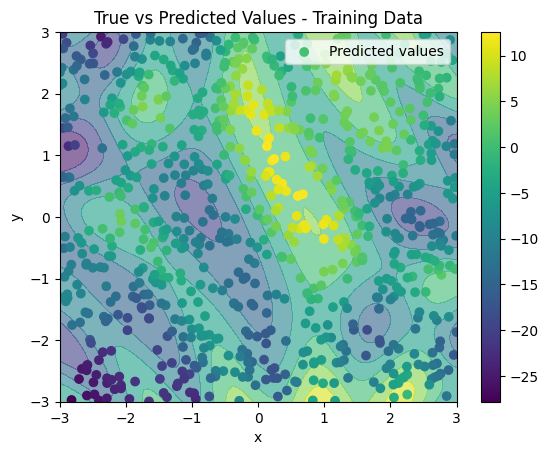

In [58]:
# Predict using the trained model
predicted_f = model.predict(xy_train)

# Plot the results
xaxis = np.linspace(-3, 3, 100)
yaxis = np.linspace(-3, 3, 100)
xaxis, yaxis = np.meshgrid(xaxis, yaxis)
ftrue = -(xaxis*(xaxis-1) + yaxis*(1-yaxis)) + 12*np.cos(xaxis*yaxis)*np.sin(2*xaxis+yaxis)
plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')
plt.scatter(x_train, y_train, c=predicted_f.flatten(), cmap='viridis', label='Predicted values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.title('True vs Predicted Values - Training Data')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\fayza\AppData\Local\Temp\ipykernel_19392\3389410477.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')


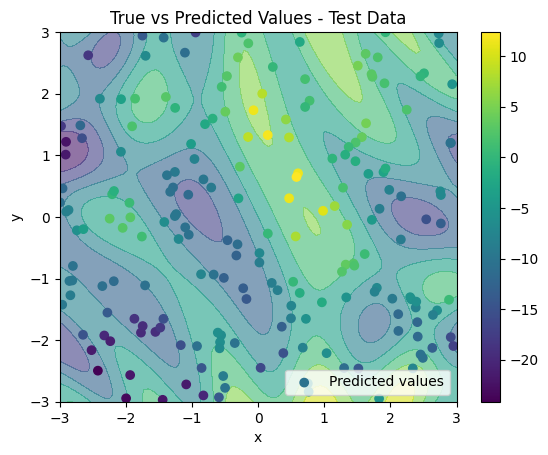

In [59]:
# Predict using the TEST model
predicted_f_test = model.predict(xy_test)

# Plot the results
xaxis = np.linspace(-3, 3, 100)
yaxis = np.linspace(-3, 3, 100)
xaxis, yaxis = np.meshgrid(xaxis, yaxis)
ftrue = -(xaxis*(xaxis-1) + yaxis*(1-yaxis)) + 12*np.cos(xaxis*yaxis)*np.sin(2*xaxis+yaxis)
plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')
plt.scatter(x_test, y_test, c=predicted_f_test.flatten(), cmap='viridis', label='Predicted values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.title('True vs Predicted Values - Test Data')
plt.show()

Now augment input data with additional features 

In [102]:
# Generate values for the function in the range (-3,3)
def generate_data_aug(num_samples=1000, xrange=(-3,3), yrange=(-3,3)):
    x_values=np.random.uniform(xrange[0], xrange[1], num_samples)
    y_values=np.random.uniform(yrange[0],yrange[1], num_samples)

    x2_values = x_values**2
    xy_values = x_values*y_values
    y2_values = y_values**2

    input_values=np.column_stack((x_values, y_values, x2_values, xy_values, y2_values))

    f_values = -(x_values*(x_values-1) + y_values*(1-y_values)) + 12*np.cos(x_values*y_values)*np.sin(2*x_values+y_values)

    return x_values, y_values, input_values, f_values

x2, y2, input2, f2 = generate_data_aug()

print(input2[:5])
print(f2[:5])
print(input2.shape)

[[-0.59128116 -0.48262682  0.34961341  0.28536814  0.23292865]
 [-0.72967498 -0.36363354  0.53242557  0.2653343   0.13222935]
 [ 0.49356333  1.86385345  0.24360476  0.91992972  3.47394967]
 [-1.99314773 -1.49596038  3.97263786  2.98167002  2.23789745]
 [-0.6885491   1.47348571  0.47409986 -1.01456726  2.17116012]]
[-11.68877617 -11.9800074    3.94334127 -10.73802395   0.14477702]
(1000, 5)


In [85]:
#train-test split
x_train2, x_test2, y_train2, y_test2, input_train2, input_test2, f_train2, f_test2 = train_test_split(x2, y2, input2, f2, test_size=0.2)

# Create the model
model2 = Sequential()

model2.add(Dense(64, input_dim=5, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.compile(loss='mean_squared_error', optimizer='adam')

c:\Users\fayza\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
epochs = 500
batch_size = 32
history2=model2.fit(input_train2, f_train2,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(input_test2, f_test2))

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4722 - val_loss: 3.9598
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6772 - val_loss: 4.0381
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9888 - val_loss: 4.4032
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1934 - val_loss: 4.1103
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4178 - val_loss: 4.2963
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8025 - val_loss: 4.4486
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9851 - val_loss: 4.0196
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5905 - val_loss: 4.0629
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7810 - val_loss: 4.4264
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9106 - val_loss: 4.2875
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0498 - val_loss: 5.2502
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5

Clearly improved performance, we are at the same loss as for 2000 iterations of the previous

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step


C:\Users\fayza\AppData\Local\Temp\ipykernel_19392\3479567250.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')


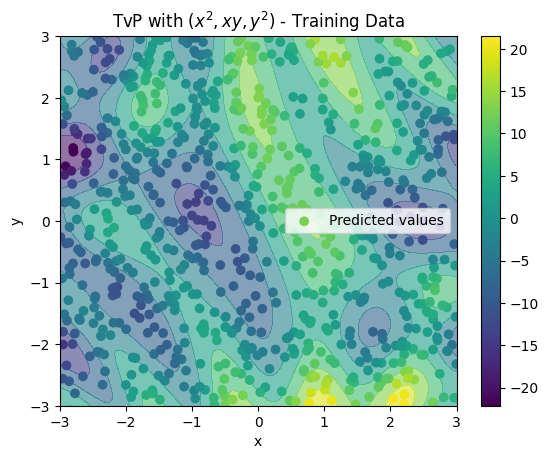

In [90]:
# Predict using the trained model
predicted_f_2 = model2.predict(input_train2)

# Plot the results
xaxis = np.linspace(-3, 3, 100)
yaxis = np.linspace(-3, 3, 100)
xaxis, yaxis = np.meshgrid(xaxis, yaxis)
ftrue = -(xaxis*(xaxis-1) + yaxis*(1-yaxis)) + 12*np.cos(xaxis*yaxis)*np.sin(2*xaxis+yaxis)
plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')
plt.scatter(x_train2, y_train2, c=predicted_f_2.flatten(), cmap='viridis', label='Predicted values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.title('TvP with $(x^2, xy, y^2)$ - Training Data')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


C:\Users\fayza\AppData\Local\Temp\ipykernel_19392\3674709669.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')


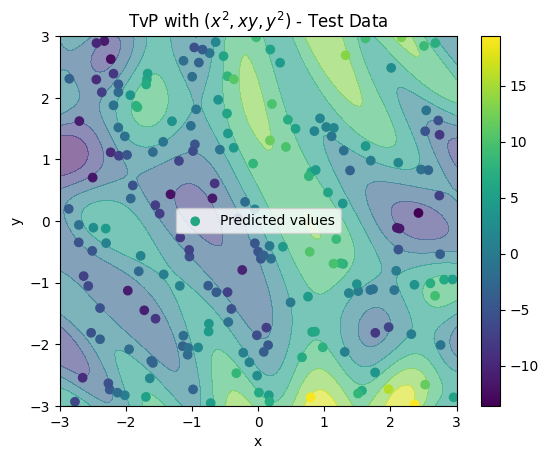

In [94]:
# Predict using the TEST model
predicted_f_2_test = model2.predict(input_test2)

# Plot the results
xaxis = np.linspace(-3, 3, 100)
yaxis = np.linspace(-3, 3, 100)
xaxis, yaxis = np.meshgrid(xaxis, yaxis)
ftrue = -(xaxis*(xaxis-1) + yaxis*(1-yaxis)) + 12*np.cos(xaxis*yaxis)*np.sin(2*xaxis+yaxis)
plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')
plt.scatter(x_test2, y_test2, c=predicted_f_2_test.flatten(), cmap='viridis', label='Predicted values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.title('TvP with $(x^2, xy, y^2)$ - Test Data')
plt.show()

Try lambda activation functions

[[ 0.55836396 -0.86343317  0.31177031 -0.48210996  0.74551684]
 [-2.41775297  2.13960966  5.8455294  -5.17304761  4.57792952]
 [-1.63822933  2.97576655  2.68379533 -4.87498803  8.85518657]
 [ 2.93325878  2.59411799  8.60400706  7.60921937  6.72944815]
 [ 1.06239911  0.23299084  1.12869187  0.24752927  0.05428473]]
[ 4.51992493 -8.12457456  0.98203284  0.8536038   7.96852886]
Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 54.9148 - val_loss: 49.2097
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.6932 - val_loss: 37.6933
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.0737 - val_loss: 32.8498
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.4006 - val_loss: 30.5389
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.9942 - val_loss: 29.0968
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.9859 - val_loss: 28.2265
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.6706 - val_loss: 26.5615
Epoch 8/500
2

C:\Users\fayza\AppData\Local\Temp\ipykernel_19392\3813952936.py:48: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')


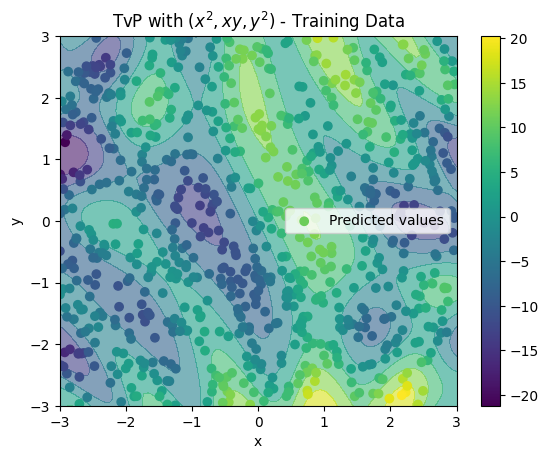

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


C:\Users\fayza\AppData\Local\Temp\ipykernel_19392\3813952936.py:64: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')


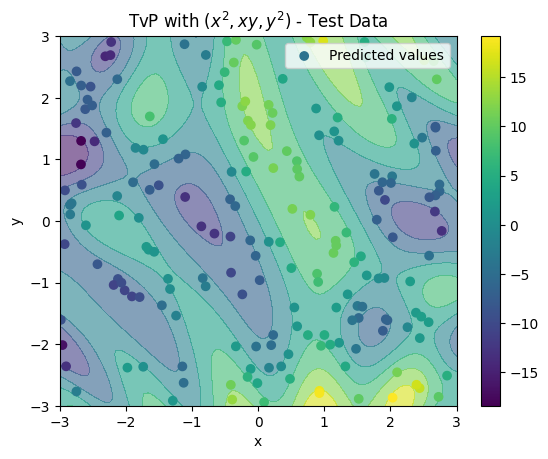

In [95]:
# Generate values for the function in the range (-3,3)
def generate_data_aug(num_samples=1000, xrange=(-3,3), yrange=(-3,3)):
    x_values=np.random.uniform(xrange[0], xrange[1], num_samples)
    y_values=np.random.uniform(yrange[0],yrange[1], num_samples)

    x2_values = x_values**2
    xy_values = x_values*y_values
    y2_values = y_values**2

    input_values=np.column_stack((x_values, y_values, x2_values, xy_values, y2_values))

    f_values = -(x_values*(x_values-1) + y_values*(1-y_values)) + 12*np.cos(x_values*y_values)*np.sin(2*x_values+y_values)

    return x_values, y_values, input_values, f_values

x, y, input, f = generate_data_aug()

print(input[:5])
print(f[:5])
#train-test split
x_train, x_test, y_train, y_test, input_train, input_test, f_train, f_test = train_test_split(x, y, input, f, test_size=0.2)

# Create the model
model = Sequential()

model.add(Dense(64, input_dim=5))
model.add(Lambda(lambda x: tf.math.sin(x))) # Custom activation function
model.add(Dense(64))
model.add(Lambda(lambda x: tf.math.sin(x))) # Custom activation function
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
epochs = 500
batch_size = 32
history3=model.fit(input_train, f_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(input_test, f_test))
# Predict using the trained model
predicted_f = model.predict(input_train)

# Plot the results
xaxis = np.linspace(-3, 3, 100)
yaxis = np.linspace(-3, 3, 100)
xaxis, yaxis = np.meshgrid(xaxis, yaxis)
ftrue = -(xaxis*(xaxis-1) + yaxis*(1-yaxis)) + 12*np.cos(xaxis*yaxis)*np.sin(2*xaxis+yaxis)
plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')
plt.scatter(x_train, y_train, c=predicted_f.flatten(), cmap='viridis', label='Predicted values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.title('TvP with $(x^2, xy, y^2)$ - Training Data')
plt.show()
# Predict using the TEST model
predicted_f_test = model.predict(input_test)

# Plot the results
xaxis = np.linspace(-3, 3, 100)
yaxis = np.linspace(-3, 3, 100)
xaxis, yaxis = np.meshgrid(xaxis, yaxis)
ftrue = -(xaxis*(xaxis-1) + yaxis*(1-yaxis)) + 12*np.cos(xaxis*yaxis)*np.sin(2*xaxis+yaxis)
plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')
plt.scatter(x_test, y_test, c=predicted_f_test.flatten(), cmap='viridis', label='Predicted values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.title('TvP with $(x^2, xy, y^2)$ - Test Data')
plt.show()

Try to implement the figure at the end of Q2

(1200, 5)
[[-1.87569727e+00  1.23818880e+00  3.51824027e+00 -2.32246735e+00
   1.53311150e+00]
 [-2.76848653e+00 -4.19888957e-01  7.66451767e+00  1.16245692e+00
   1.76306736e-01]
 [ 1.20917537e+00  8.11217575e-01  1.46210507e+00  9.80904308e-01
   6.58073954e-01]
 ...
 [ 3.58431396e-02  1.26017080e+00  1.28473066e-03  4.51684779e-02
   1.58803044e+00]
 [-1.36656437e+00 -2.47303030e+00  1.86749817e+00  3.37955509e+00
   6.11587886e+00]
 [-3.11351752e-01 -1.06362247e+00  9.69399136e-02  3.31160719e-01
   1.13129275e+00]]
(None, 5)
(None, 64)
(None, 64)
(None, 192)
Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 48.9105
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.4569
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.2579
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.6527
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.7927
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.8875
Epoch 7/500
38/38 ━━━━━━━━━━

C:\Users\fayza\AppData\Local\Temp\ipykernel_19392\4136779964.py:59: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')


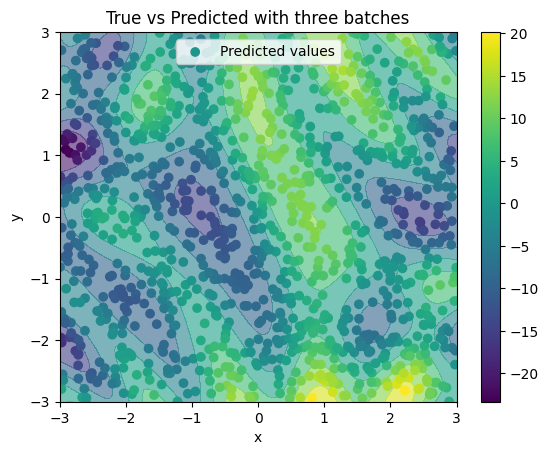

In [ ]:
# Generate values for the function in the range (-3,3)
def generate_data(num_samples=1200, xrange=(-3,3), yrange=(-3,3)):
    x_values=np.random.uniform(xrange[0], xrange[1], num_samples)
    y_values=np.random.uniform(yrange[0],yrange[1], num_samples)

    x2_values = x_values**2
    xy_values = x_values*y_values
    y2_values = y_values**2

    input_values=np.column_stack((x_values, y_values, x2_values, xy_values, y2_values))

    f_values = -(x_values*(x_values-1) + y_values*(1-y_values)) + 12*np.cos(x_values*y_values)*np.sin(2*x_values+y_values)

    return x_values, y_values, input_values, f_values

x, y, input, f = generate_data()

# Create the model
input_layer=Input(shape=(5,))

# Apply a Dense layer to each batch, with custom activation functions
dense1 = Dense(64)(input_layer) 
dense2 = Dense(64)(input_layer)
dense2 = Lambda(lambda x: tf.math.sin(x))(dense2)
dense3 = Dense(64)(input_layer)
dense3 = Lambda(lambda x: tf.math.cos(x))(dense3)

# Concatenate the results 
concatenated = Concatenate()([dense1, dense2, dense3])
print(concatenated.shape)
# Add another Dense layer
dense4 = Dense(64, activation='relu')(concatenated)
# Output layer
output = Dense(1, activation='linear')(dense4)
# Build the model
model=Model(inputs=input_layer, outputs=output)
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

epochs = 500
batch_size = 32
history4=model.fit(input, f,
          epochs=epochs, 
          batch_size=batch_size,
          verbose=1,
          )

# Predict using the trained model
predicted_f = model.predict(input)

# Plot the results
xaxis = np.linspace(-3, 3, 100)
yaxis = np.linspace(-3, 3, 100)
xaxis, yaxis = np.meshgrid(xaxis, yaxis)
ftrue = -(xaxis*(xaxis-1) + yaxis*(1-yaxis)) + 12*np.cos(xaxis*yaxis)*np.sin(2*xaxis+yaxis)
plt.contourf(xaxis, yaxis, ftrue, cmap='viridis', alpha=0.6, label='True values')
plt.scatter(x, y, c=predicted_f.flatten(), cmap='viridis', label='Predicted values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.title('True vs Predicted with three batches')
plt.show()
